In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv
/kaggle/input/food-com-recipes-and-user-interactions/ingr_map.pkl
/kaggle/input/food-com-recipes-and-user-interactions/PP_recipes.csv
/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_train.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_test.csv
/kaggle/input/food-com-recipes-and-user-interactions/PP_users.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_validation.csv


In [2]:
interactions = pd.read_csv("/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv")
interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [3]:
recipes = pd.read_csv("/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv")
recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


## Marge Interations data with the original Recipes data on column "id"

In [4]:
df = pd.merge(recipes,interactions, how="outer", left_on = 'id', right_on= 'recipe_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1132366 non-null  object
 1   id              1132367 non-null  int64 
 2   minutes         1132367 non-null  int64 
 3   contributor_id  1132367 non-null  int64 
 4   submitted       1132367 non-null  object
 5   tags            1132367 non-null  object
 6   nutrition       1132367 non-null  object
 7   n_steps         1132367 non-null  int64 
 8   steps           1132367 non-null  object
 9   description     1108857 non-null  object
 10  ingredients     1132367 non-null  object
 11  n_ingredients   1132367 non-null  int64 
 12  user_id         1132367 non-null  int64 
 13  recipe_id       1132367 non-null  int64 
 14  date            1132367 non-null  object
 15  rating          1132367 non-null  int64 
 16  review          1132198 non-null  object
dtypes: int64

In [5]:
df.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


## Let's find answers to some cool questions!

### What is the best recipe by user ratings and number of reviews?

In [6]:
rating = df[['name','rating','recipe_id']].groupby(['recipe_id','name'])['rating'].agg(['mean','count'])\
                                                        .rename(columns={"mean": "average_rating", "count": "No_of_Reviews"})
(rating.sort_values(by = ['average_rating','No_of_Reviews'], ascending= False)).head(n=10)

,,average_rating,No_of_Reviews
recipe_id,name,,
55309,caprese salad tomatoes italian marinated tomatoes,5.0,52
24768,berry cream cheese coffee cake,5.0,37
121941,kittencal s soft white baguette style bread,5.0,36
166669,kittencal s caesar tortellini salad,5.0,36
62754,linda s special potato salad,5.0,32
199171,broiled cinnamon toast,5.0,31
269136,earth bread,5.0,31
45107,strawberry cheese ring,5.0,28
94087,cranberry nut swirls,5.0,28


## Pre-processing of the data
 Some columns like nutritional values and ingredients are read as strings by python rather than list objects.
1. We will now convert ingredients to list objects so that we can use them as iterables while text processing.
2. We will convert nutritional values column to columns of nutritional values so that we can use them for comparision of different recipes nutritional values.

Coverting nutritional values column to columns of nutritional values

In [7]:
NutriList=['cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

NutriList_Columns = pd.DataFrame(df['nutrition'].apply(eval).to_list(),\
                        index=df.index\
                        ,columns=NutriList)

df = df.join(NutriList_Columns)
df.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,date,rating,review,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2010-08-21,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2011-12-05,5,Excellent recipe! I used butternut squash and ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2006-08-27,5,This recipe was wonderful. Instead of using t...,173.4,18.0,0.0,17.0,22.0,35.0,1.0


Converting ingredients string to list of ingredients

In [8]:
df['ingredients'] = df['ingredients'].apply(eval)
df['ingredients'].head()

0    [winter squash, mexican seasoning, mixed spice...
1    [winter squash, mexican seasoning, mixed spice...
2    [winter squash, mexican seasoning, mixed spice...
3    [prepared pizza crust, sausage patty, eggs, mi...
4    [prepared pizza crust, sausage patty, eggs, mi...
Name: ingredients, dtype: object

In [9]:
type(df['ingredients'][0])

list

Converting ingredients list back to usable text strings

In [10]:
df['ingredients'] = [','.join(z).strip() for z in df['ingredients']]
df['ingredients'].head()

0    winter squash,mexican seasoning,mixed spice,ho...
1    winter squash,mexican seasoning,mixed spice,ho...
2    winter squash,mexican seasoning,mixed spice,ho...
3    prepared pizza crust,sausage patty,eggs,milk,s...
4    prepared pizza crust,sausage patty,eggs,milk,s...
Name: ingredients, dtype: object

# EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

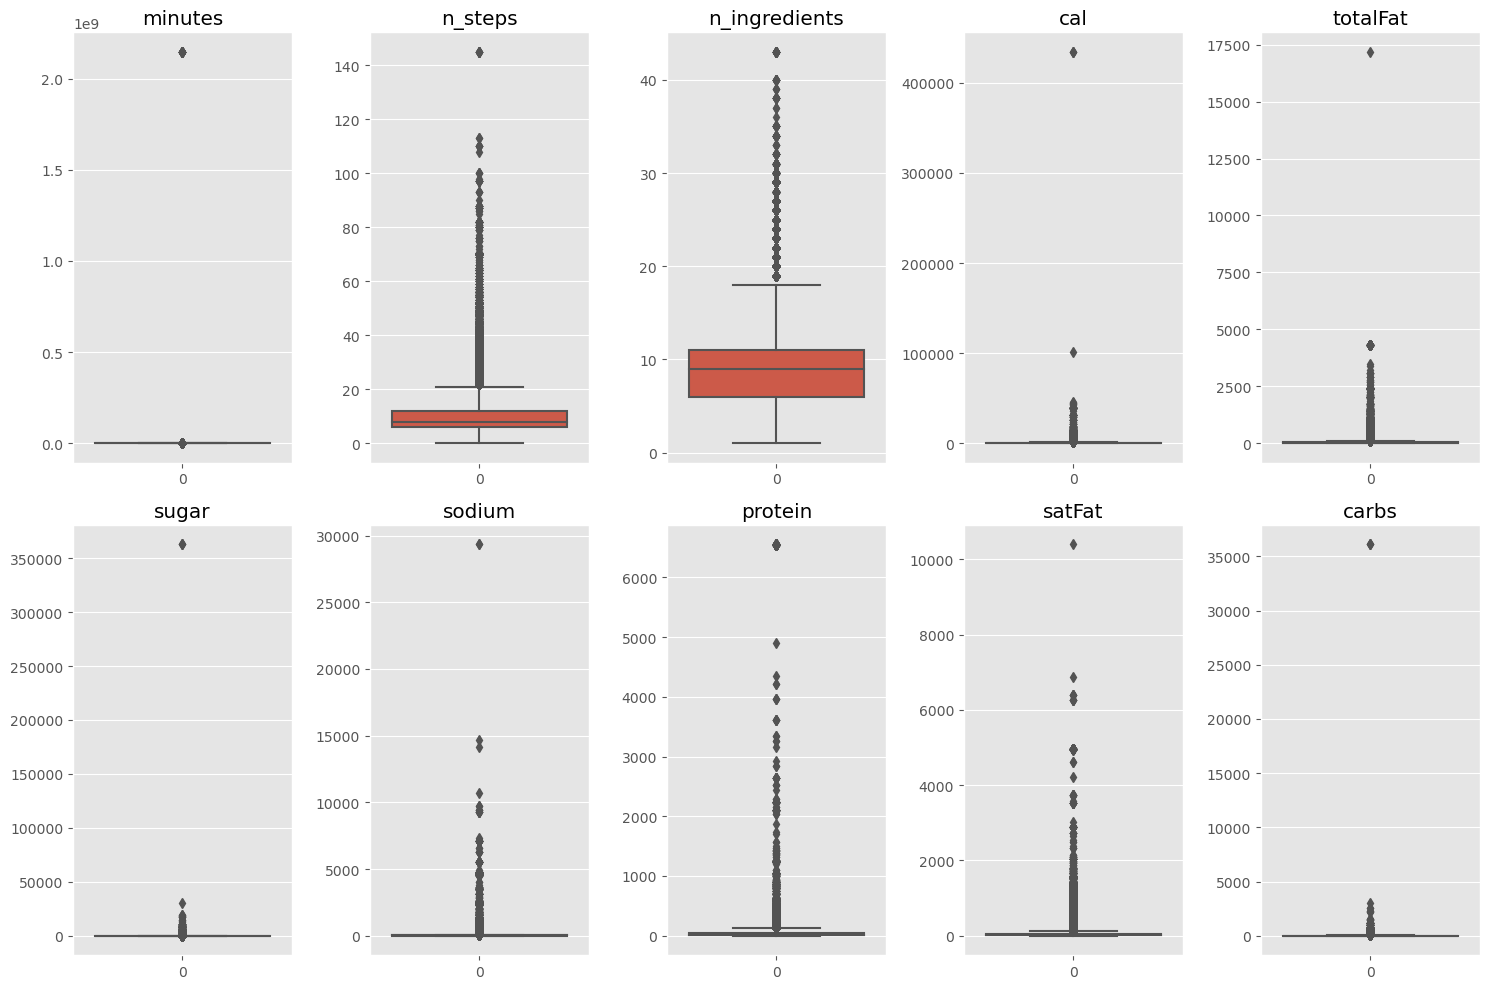

In [12]:
#Get all numeric columns
numeric_columns = ['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(15,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    sns.boxplot(data=df[numeric_columns[i]],ax=ax)
    ax.set(title=numeric_columns[i])
plt.tight_layout()
plt.show()

There are many outliers, so we should remove outliers

To remove the outliers i will set my lower and upper bound as : lower bound = Q1 - 1.5 * IQR upper bound = Q3 + 1.5 * IQR. For more infomation see the below figure.


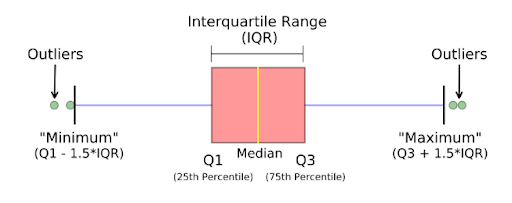

The values out of these range are considered as outliers and we have to remove them.

In [13]:
# Removing values according to IQR
Columns_Remove_Outliers=['n_steps','minutes','n_ingredients','cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']
for col in Columns_Remove_Outliers:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    colmax = df[col].quantile(0.75) + 1.5 * IQR
    colmin = df[col].quantile(0.25) - 1.5 * IQR
    df = df[ (df[col] < colmax) & (df[col] > colmin) ]


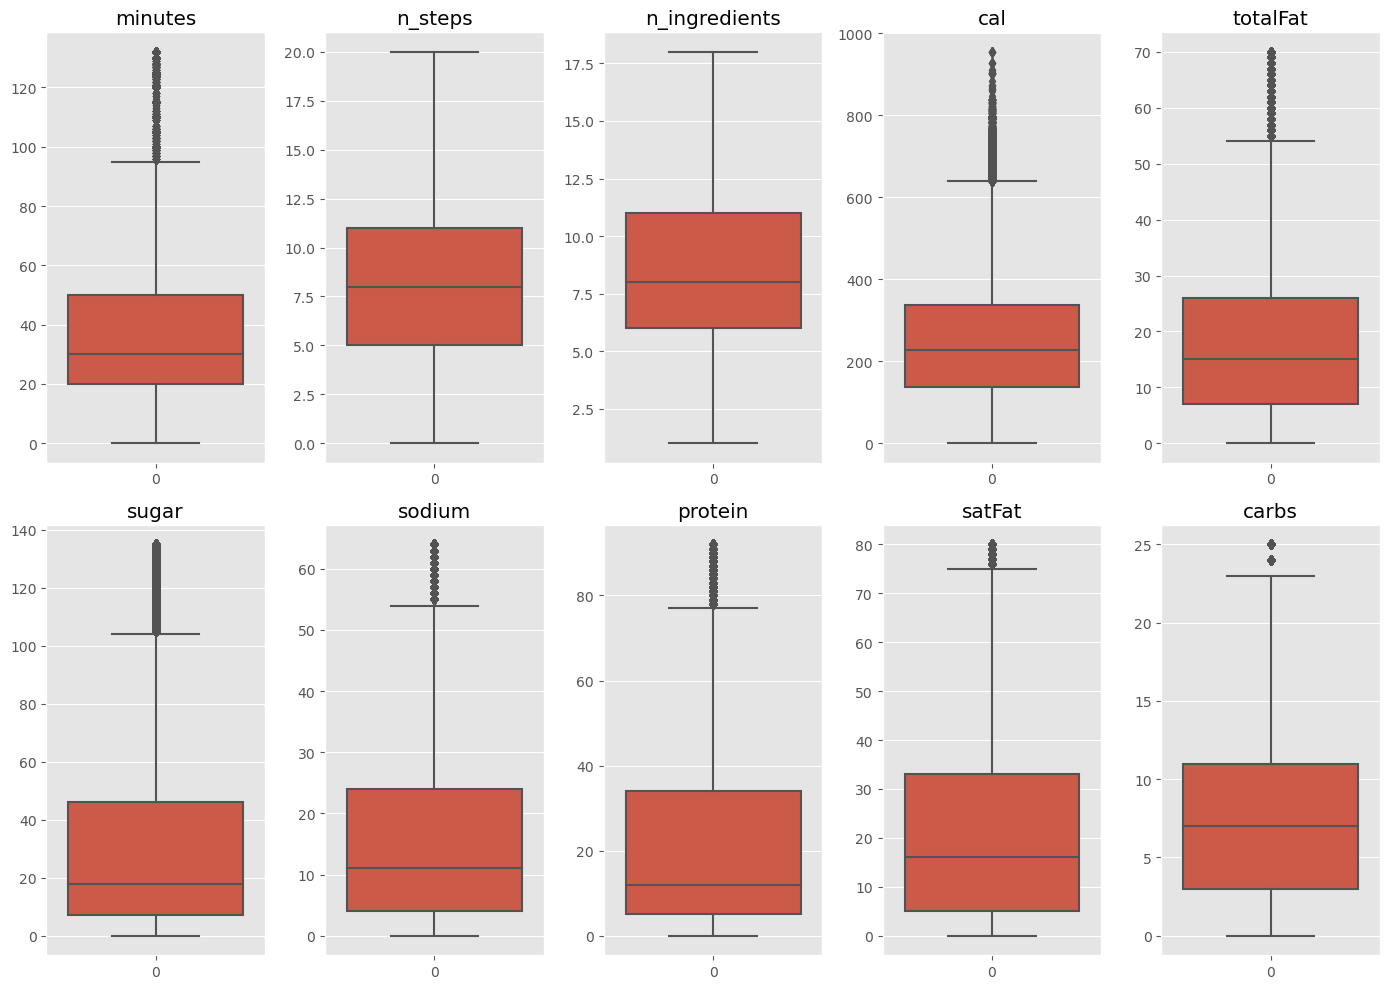

In [14]:
#Now we will look at distributions again
plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(14,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    sns.boxplot(data=df[numeric_columns[i]],ax=ax)
    ax.set(title=numeric_columns[i])
plt.tight_layout()
plt.show()

This is much better than before removing the outliers

In [15]:
df.shape

(681529, 24)

In [16]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,user_id,recipe_id,rating,cal,totalFat,sugar,sodium,protein,satFat,carbs
count,681529.000000,681529.000000,6.815290e+05,681529.000000,681529.000000,6.815290e+05,681529.000000,681529.000000,681529.000000,681529.000000,681529.000000,681529.000000,681529.000000,681529.000000,681529.000000
mean,165070.274238,37.183137,2.255315e+06,8.511934,8.442376,1.277264e+08,165070.274238,4.431619,245.773590,17.595486,30.754819,15.813249,21.712812,21.425999,7.576463
std,130650.681980,25.243758,6.164117e+07,4.044032,3.223988,4.831046e+08,130650.681980,1.221984,140.748095,14.013828,31.914752,14.847214,22.296866,19.588747,5.717056
min,45.000000,0.000000,2.700000e+01,0.000000,1.000000,1.533000e+03,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56818.000000,20.000000,3.744900e+04,5.000000,6.000000,1.331740e+05,56818.000000,4.000000,136.000000,7.000000,7.000000,4.000000,5.000000,5.000000,3.000000
50%,127331.000000,30.000000,9.369800e+04,8.000000,8.000000,3.233400e+05,127331.000000,5.000000,227.200000,15.000000,18.000000,11.000000,12.000000,16.000000,7.000000
75%,251524.000000,50.000000,2.564110e+05,11.000000,11.000000,7.441790e+05,251524.000000,5.000000,337.300000,26.000000,46.000000,24.000000,34.000000,33.000000,11.000000
max,537716.000000,132.000000,2.002285e+09,20.000000,18.000000,2.002373e+09,537716.000000,5.000000,954.800000,70.000000,135.000000,64.000000,92.000000,80.000000,25.000000


In [17]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,date,rating,review,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2010-08-21,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2011-12-05,5,Excellent recipe! I used butternut squash and ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2006-08-27,5,This recipe was wonderful. Instead of using t...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132362,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style",...,2009-10-14,5,These were very good. I meant to add some jala...,59.2,6.0,2.0,3.0,6.0,5.0,0.0
1132363,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...",...,2008-05-02,1,I would rate this a zero if I could. I followe...,188.0,11.0,57.0,11.0,7.0,21.0,9.0
1132364,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...",...,2008-06-19,1,This recipe tastes nothing like the Cookies by...,174.9,14.0,33.0,4.0,4.0,11.0,6.0
1132365,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...",...,2010-02-08,5,"yummy cookies, i love this recipe me and my sm...",174.9,14.0,33.0,4.0,4.0,11.0,6.0


In [18]:
#create a file
picklefile = open('data_without_outliers.pkl', 'wb')
#pickle the dataframe
pickle.dump(df, picklefile)


In [19]:
#close file
picklefile.close()

In [20]:

data = pd.DataFrame().assign(user_id=df['user_id'], recipe_id=df['recipe_id'], date=df['date'], rating=df['rating'], review=df['review'])



In [21]:
data

,user_id,recipe_id,date,rating,review
0,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...
...,...,...,...,...,...
1132362,844554,308080,2009-10-14,5,These were very good. I meant to add some jala...
1132363,804234,298512,2008-05-02,1,I would rate this a zero if I could. I followe...
1132364,866651,298509,2008-06-19,1,This recipe tastes nothing like the Cookies by...
1132365,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681529 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    681529 non-null  int64 
 1   recipe_id  681529 non-null  int64 
 2   date       681529 non-null  object
 3   rating     681529 non-null  int64 
 4   review     681443 non-null  object
dtypes: int64(3), object(2)
memory usage: 47.3+ MB


### Checking for NaN values

In [23]:
data = data.dropna(axis=0, subset=['review','date'])
data.shape

(681443, 5)

In [24]:
print("No of NaN values in our dataframe: ", sum(data.isnull().any()))

No of NaN values in our dataframe:  0


### Removing duplicates

In [25]:
dup_bool = data.duplicated(['user_id','recipe_id','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


### Basic Statistics (#Ratings, #Users, and #Recipes)

In [26]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",data.shape[0])
print("Total No of Users   :", len(np.unique(data.user_id)))
print("Total No of Recipes  :", len(np.unique(data.recipe_id)))

Total data 
--------------------------------------------------

Total no of ratings : 681443
Total No of Users   : 144175
Total No of Recipes  : 139301


In [27]:
data.sort_values("date")
data

,user_id,recipe_id,date,rating,review
0,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...
...,...,...,...,...,...
1132362,844554,308080,2009-10-14,5,These were very good. I meant to add some jala...
1132363,804234,298512,2008-05-02,1,I would rate this a zero if I could. I followe...
1132364,866651,298509,2008-06-19,1,This recipe tastes nothing like the Cookies by...
1132365,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."


In [28]:
#create a file
picklefile = open('data_for_train_test.pkl', 'wb')
#pickle the dataframe
pickle.dump(data, picklefile)


In [29]:
#close file
picklefile.close()

### Spliting data into Train and Test(80:20) on time feature

In [30]:
import os

In [31]:
if not os.path.isfile('train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    data.iloc[:int(data.shape[0]*0.80)].to_csv("train.csv", index=False)

if not os.path.isfile('test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    data.iloc[int(data.shape[0]*0.80):].to_csv("test.csv", index=False)

train_df = pd.read_csv("train.csv", parse_dates=['date'])
test_df = pd.read_csv("test.csv")

### Basic Statistics in Train data (#Ratings, #Users, and #Recipes)

In [32]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user_id)))
print("Total No of Recipes  :", len(np.unique(train_df.recipe_id)))

Training data 
--------------------------------------------------

Total no of ratings : 545154
Total No of Users   : 121016
Total No of Recipes  : 111529


In [33]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user_id)))
print("Total No of Recipes  :", len(np.unique(test_df.recipe_id)))

Test data 
--------------------------------------------------

Total no of ratings : 136289
Total No of Users   : 45722
Total No of Recipes  : 27773


### Exploratory Data Analysis on Train data

#### method to make y-axis more readable to scale kilo, Million, Billion values

In [34]:
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

#### Distribution of ratings

In [35]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set_theme(style="whitegrid")

In [36]:
 %matplotlib inline

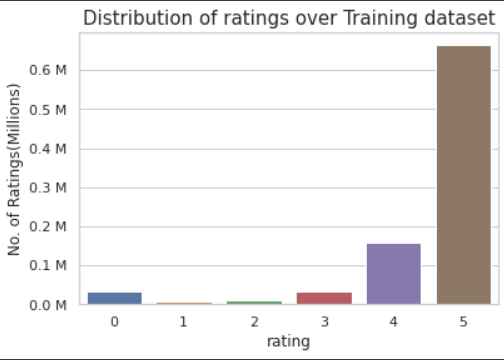

#### Number of Ratings per a month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


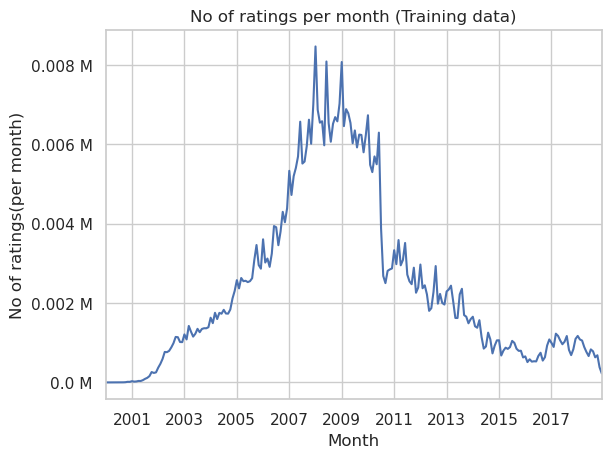

In [37]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

#### Analysis on the Ratings given by user

In [38]:
no_of_rated_recipes_per_user = train_df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_recipes_per_user

user_id
424680        3866
37449         3151
383346        3043
169430        2289
128473        2018
              ... 
1042137          1
1042018          1
1041933          1
1041734          1
2002372464       1
Name: rating, Length: 121016, dtype: int64

Here we are notice that we have very very few rating data is available.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == "__main__":


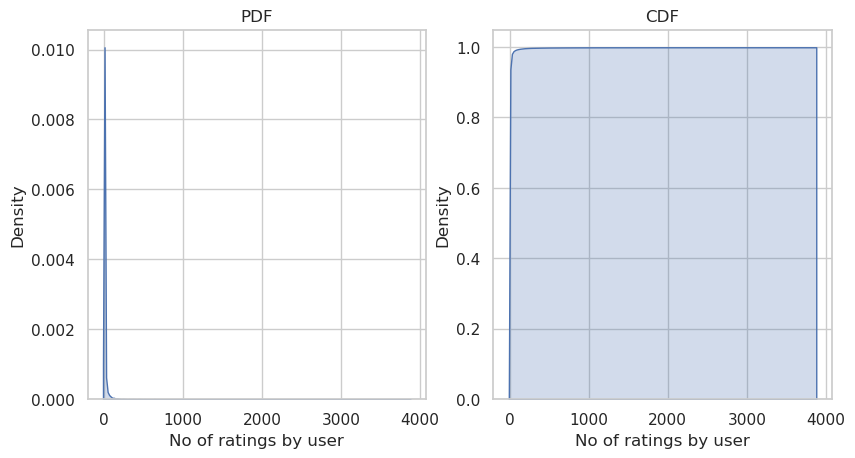

In [39]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_recipes_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_recipes_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [40]:
train_df['rating'] = train_df['rating'].replace(0, np.nan)

In [41]:
train_df["rating"].describe()

count    518758.000000
mean          4.658436
std           0.713491
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [42]:
print("No of NaN values in our dataframe: ", train_df["rating"].isna().sum())

No of NaN values in our dataframe:  26396


In [43]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()

from scipy import sparse
from scipy.sparse import csr_matrix

## Creating sparse matrix from data frame

### Creating sparse matrix from train data frame

In [44]:
train_df

,user_id,recipe_id,date,rating,review
0,4470,137739,2006-02-18,5.0,I used an acorn squash and recipe#137681 Swee...
1,593927,137739,2010-08-21,5.0,This was a nice change. I used butternut squas...
2,178427,137739,2011-12-05,5.0,Excellent recipe! I used butternut squash and ...
3,28603,31490,2002-08-19,NaN,"Have not tried this, but it sounds delicious. ..."
4,346277,31490,2006-08-27,5.0,This recipe was wonderful. Instead of using t...
...,...,...,...,...,...
545149,68960,115404,2007-01-18,5.0,"Chia, you are one of my most favourite chefs. ..."
545150,322381,115404,2007-08-14,3.0,"Definitely a quick, easy and healthy option fo..."
545151,544026,115404,2007-11-17,4.0,"I made this recipe, only changed it to ""chicke..."
545152,1221394,498744,2013-11-26,5.0,Found this also in Cooking Light but didn&#039...


In [45]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user_id.values,
                                               train_df.recipe_id.values)),)
    
    print('Done. It\'s shape is : (user, recipe) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, recipe) :  (2002372465, 537717)
Saving it into disk for furthur usage..
Done..

0:01:20.890976


## The Sparsity of Train Sparse Matrix

In [46]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.99999994936853 % 


## Creating sparse matrix from test data frame

In [47]:
test_df

,user_id,recipe_id,date,rating,review
0,1157188,316098,2010-01-11,5,"Great recipe! I need to go grocery shopping, ..."
1,115053,316098,2010-02-10,4,This was really good. Followed recipe pretty ...
2,198154,316098,2017-05-04,4,I made this for dinner tonight using fresh bab...
3,49304,51193,2003-02-18,5,"Chia, this is a delicious Shrimp recipe, love ..."
4,92385,51193,2004-05-11,5,"Very nice! This is fresh tasting, because of t..."
...,...,...,...,...,...
136284,844554,308080,2009-10-14,5,These were very good. I meant to add some jala...
136285,804234,298512,2008-05-02,1,I would rate this a zero if I could. I followe...
136286,866651,298509,2008-06-19,1,This recipe tastes nothing like the Cookies by...
136287,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."


In [48]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user_id.values,
                                               test_df.recipe_id.values)))
    
    print('Done. It\'s shape is : (user, recipe) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, recipe) :  (2002372707, 537040)
Saving it into disk for furthur usage..
Done..

0:01:19.298774


In [49]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.99999998796861 % 
